**Load data**

In [1]:
import pandas as pd

birddata = pd.read_csv("bird_tracking.csv")
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


**Pandas basic operations on groups within a dataframe**

In [3]:
# First, use `groupby` to group up the data.
grouped_birds = birddata.groupby("bird_name")

# Now operations are performed on each group.
mean_speeds = grouped_birds.speed_2d.mean()

# The `head` method prints the first 5 lines of each bird.
print(grouped_birds.head())

# Find the mean `altitude` for each bird.
# Assign this to `mean_altitudes`.
mean_altitudes = grouped_birds.altitude.mean()
print(mean_altitudes)

       altitude               date_time  device_info_serial   direction  \
0            71  2013-08-15 00:18:08+00                 851 -150.469753   
1            68  2013-08-15 00:48:07+00                 851 -136.151141   
2            68  2013-08-15 01:17:58+00                 851  160.797477   
3            73  2013-08-15 01:47:51+00                 851   32.769360   
4            69  2013-08-15 02:17:42+00                 851   45.191230   
19795       382  2013-08-15 00:20:45+00                 864  145.179141   
19796       197  2013-08-15 00:51:00+00                 864  -25.393443   
19797       206  2013-08-15 01:21:08+00                 864  158.480445   
19798       200  2013-08-15 01:50:57+00                 864  139.613245   
19799       199  2013-08-15 02:20:48+00                 864 -134.485593   
40916        55  2013-08-15 00:01:08+00                 833  -91.499509   
40917        54  2013-08-15 00:31:00+00                 833 -141.804053   
40918        55  2013-08-

**Group the flight times by date and calculate the mean altitude within that day**

In [4]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Check the head of the column.
birddata.date.head()

grouped_bydates = birddata.groupby("date")
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [6]:
mean_altitudes_perday.head()

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
Name: altitude, dtype: float64

In [9]:
grouped_birdday = birddata.groupby(["bird_name", "date"])
mean_altitudes_perday = grouped_birdday.altitude.mean()

# look at the head of `mean_altitudes_perday`.
mean_altitudes_perday.head()


bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

 **Find the average speed for each bird and day.**

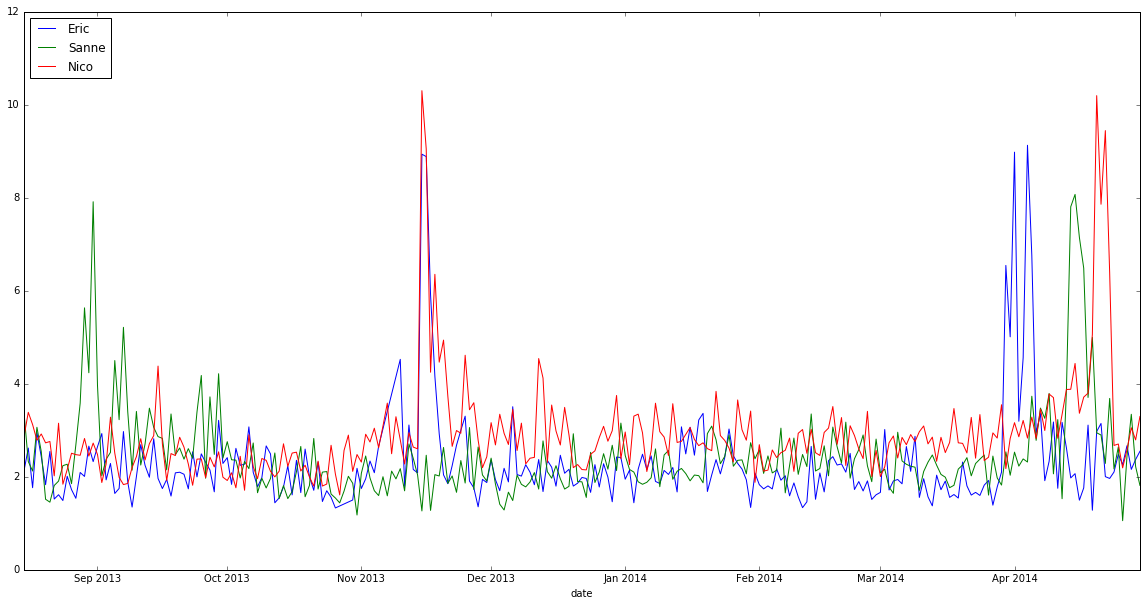

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()